# USDA Monthly Food Sales

The data regarding monthly food sales was imported from the USDA ERS Food Expenditure Series at https://www.ers.usda.gov/data-products/food-expenditure-series/. The dataset was converted to a csv file and contains information pertaining to monthly food sales from January 1997 through December 2021 in $ millions.



## This script contains the following points:
1. Import libraries
2. Import monthly_sales.csv dataset and assign to sales1
3. Clean/verify dataset
4. Preparing the dataset for time series analysis
5. Checking Stationarity
6. Stationarizing the 'Total constant dollar food sales' data
7. Bonus Task
8. Splitting the data
9. Second iteration
10. Third iteration
11. Fourth iteration


### 1. Importing Libraries

In [1]:
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

### 2. Importing monthly_sales dataset and assigning to sales1

In [3]:
path = r'C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 6\Food_Desert'

In [181]:
sales1 = pd.read_csv(os.path.join(path, '02_Data', 'cleaned_data', 'monthly_sales_01.csv'), index_col=False)

### 3. Cleaning and verifying dataset

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [182]:
# print header
sales1.head(100)

Year      Month       FAH      FAFH  Total nominal food sales     FAH.1  \
0   2021   December  90032.96  83967.57                 174000.53  39244.32   
1   2021   November  82633.36  79112.24                 161745.59  36177.24   
2   2021    October  81702.69  83819.18                 165521.86  35891.87   
3   2021  September  77365.31  80317.72                 157683.03  34346.52   
4   2021     August  79855.82  84015.32                 163871.14  35843.79   
5   2021       July  79870.68  86513.69                 166384.38  35961.60   
6   2021       June  77678.75  82098.06                 159776.81  35193.45   
7   2021        May  79202.10  81567.60                 160769.70  36149.88   
8   2021      April  75029.05  75817.85                 150846.89  34346.82   
9   2021      March  77285.47  73221.19                 150506.66  35593.39   
10  2021   February  67068.04  57736.95                 124804.99  30950.75   
11  2021    January  73211.92  60187.43                 133399.36  33867.66   
12  2020   December  80446.20  59478.10                 139924.30  37340.71   
13  2020   November  74369.72  58292.62                 132662.34  34636.75   
14  2020    October  73721.54  64735.28                 138456.81  34126.21   
15  2020  September  70391.77  61989.29                 132381.06  32658.27   
16  2020     August  73410.99  63779.48                 137190.47  33926.09   
17  2020       July  74914.88  61896.27                 136811.16  34591.84   
18  2020       June  72075.36  58053.89                 130129.25  32956.81   
19  2020        May  75467.18  48636.03                 124103.21  34672.45   
20  2020      April  69951.72  35716.41                 105668.13  32407.33   
21  2020      March  80197.89  54315.55                 134513.44  38146.78   
22  2020   February  63667.66  68364.01                 132031.67  30421.06   
23  2020    January  65927.40  67764.94                 133692.33  31622.41   
24  2019   December  74876.22  73010.26                 147886.47  36115.97   
25  2019   November  70014.52  69865.67                 139880.20  33773.62   
26  2019    October  67665.57  72372.41                 140037.97  32557.23   
27  2019  September  64398.03  70282.41                 134680.44  31086.80   
28  2019     August  69526.13  76211.56                 145737.69  33616.09   
29  2019       July  68341.61  75034.92                 143376.53  33014.78   
30  2019       June  66937.57  74846.09                 141783.66  32329.78   
31  2019        May  69200.60  76053.30                 145253.89  33320.68   
32  2019      April  65138.13  71371.07                 136509.20  31399.04   
33  2019      March  66432.76  73945.92                 140378.67  31933.64   
34  2019   February  59087.55  64274.30                 123361.84  28461.28   
35  2019    January  64255.12  64618.79                 128873.91  31037.13   
36  2018   December  73034.62  70102.19                 143136.81  35482.65   
37  2018   November  67857.54  65853.47                 133711.02  33055.36   
38  2018    October  65523.43  68512.75                 134036.17  31848.04   
39  2018  September  63264.76  66787.08                 130051.84  30719.32   
40  2018     August  66567.95  72188.25                 138756.20  32338.34   
41  2018       July  65507.80  71627.65                 137135.45  31849.51   
42  2018       June  65210.96  71633.62                 136844.58  31793.31   
43  2018        May  66929.48  71758.64                 138688.13  32613.98   
44  2018      April  61813.55  67111.19                 128924.74  30015.85   
45  2018      March  66457.79  69974.94                 136432.72  32402.54   
46  2018   February  58681.43  60861.97                 119543.41  28607.70   
47  2018    January  61977.13  60883.80                 122860.92  30134.54   
48  2017   December  72844.10  68268.22                 141112.33  35604.38   
49  2017   November  65690.51  62302.86               

In [36]:
# number of rows/columns
sales1.shape

(304, 10)

In [185]:
# descriptive analysis
sales1.describe()

Year           FAH          FAFH  Total nominal food sales  \
count   300.000000    300.000000    300.000000                300.000000   
mean   2009.000000  50684.466667  45506.668800              96191.135133   
std       7.223151  13179.595824  15488.734175              28294.634634   
min    1997.000000  28154.230000  21313.570000              49467.800000   
25%    2003.000000  39059.955000  32136.457500              71546.332500   
50%    2009.000000  50318.360000  43038.370000              93233.945000   
75%    2015.000000  60300.855000  57503.152500             118150.180000   
max    2021.000000  90032.960000  86513.690000             174000.530000   

              FAH.1        FAFH.1  Total constant dollar food sales  
count    300.000000    300.000000                        300.000000  
mean   27794.608233  24333.017567                      52068.667967  
std     3458.552515   3810.372876                       7051.107274  
min    20533.080000  14971.170000                      37353.720000  
25%    25341.185000  21447.850000                      46883.302500  
50%    27432.795000  24013.275000                      51298.665000  
75%    29554.260000  26739.605000                      56685.195000  
max    39244.320000  34218.650000                      71654.880000

In [186]:
# datatypes
sales1.dtypes

Year                                  int64
Month                                object
FAH                                 float64
FAFH                                float64
Total nominal food sales            float64
FAH.1                               float64
FAFH.1                              float64
Total constant dollar food sales    float64
dtype: object

In [187]:
# ID missing values
sales1.isnull().sum()

Year                                0
Month                               0
FAH                                 0
FAFH                                0
Total nominal food sales            0
FAH.1                               0
FAFH.1                              0
Total constant dollar food sales    0
dtype: int64

There are no missing values in the dataset.

In [188]:
sales1.columns

Index(['Year', 'Month', 'FAH', 'FAFH', 'Total nominal food sales', 'FAH.1',
       'FAFH.1', 'Total constant dollar food sales'],
      dtype='object')

### 4. Preparing the dataset for time series analysis

I wish to conduct a time series analysis on monthly food sales from the years 1997-2021.

In [189]:
# dropping columns so that only Total constant dollar food sales rate remains
sales2 = sales1.drop(columns = ['FAH', 'FAFH','Total nominal food sales','FAH.1',
       'FAFH.1'
        ])

In [190]:
sales2.columns

Index(['Year', 'Month', 'Total constant dollar food sales'], dtype='object')

In [191]:
sales2.head(100)

Year      Month  Total constant dollar food sales
0   2021   December                          71654.88
1   2021   November                          66948.58
2   2021    October                          68825.48
3   2021  September                          66194.66
4   2021     August                          69376.72
5   2021       July                          70696.02
6   2021       June                          68360.66
7   2021        May                          69285.66
8   2021      April                          65276.40
9   2021      March                          65435.39
10  2021   February                          54350.92
11  2021    January                          58184.79
12  2020   December                          61237.57
13  2020   November                          58265.25
14  2020    October                          60639.12
15  2020  September                          58121.41
16  2020     August                          60251.76
17  2020       July                          60133.44
18  2020       June                          57004.20
19  2020        May                          54634.00
20  2020      April                          46811.64
21  2020      March                          60508.72
22  2020   February                          59581.03
23  2020    January                          60519.70
24  2019   December                          67263.03
25  2019   November                          63708.84
26  2019    October                          63740.17
27  2019  September                          61464.73
28  2019     August                          66648.16
29  2019       July                          65602.90
30  2019       June                          64926.86
31  2019        May                          66504.13
32  2019      April                          62597.88
33  2019      March                          64368.27
34  2019   February                          56675.89
35  2019    January                          59394.17
36  2018   December                          66279.51
37  2018   November                          62117.15
38  2018    October                          62273.35
39  2018  September                          60413.91
40  2018     August                          64537.58
41  2018       July                          63866.95
42  2018       June                          63861.09
43  2018        May                          64755.42
44  2018      April                          60170.38
45  2018      March                          63886.11
46  2018   February                          56000.58
47  2018    January                          57533.02
48  2017   December                          66375.10
49  2017   November                          60292.41
50  2017    October                          60028.32
51  2017  September                          59106.16
52  2017     August                          61144.56
53  2017       July                          60959.59
54  2017       June                          60839.43
55  2017        May                          61899.15
56  2017      April                          59926.74
57  2017      March                          61139.97
58  2017   February                          54873.27
59  2017    January                          56463.83
60  2016   December                          63844.62
61  2016   November                          58189.18
62  2016    October                          58502.81
63  2016  September                          56776.55
64  2016     August                          58709.63
65  2016       July                          59487.70
66  2016       June                          58389.99
67  2016        May                          59621.73
68  2016      April                          57513.65
69  2016      March                          58407.05
70  2016   February                          53988.09
71  2016    January                          54287.42
72  2015   December                          60875.51
73  2015

In [192]:
sales2.tail()

Year     Month  Total constant dollar food sales
295  1997       May                          43464.45
296  1997     April                          40317.55
297  1997     March                          41673.64
298  1997  February                          37353.72
299  1997   January                          39108.55

In [193]:
sales2.dtypes

Year                                  int64
Month                                object
Total constant dollar food sales    float64
dtype: object

In [194]:
sales2.isnull().sum()

Year                                0
Month                               0
Total constant dollar food sales    0
dtype: int64

In [378]:
# converting 'year' to string
sales2['Year'] = sales2['Year'].astype('str')

In [379]:
sales2.dtypes

Year                                 object
Month                                object
Total constant dollar food sales    float64
Date                                 object
dtype: object

In [163]:
sales2.head()

Year      Month Total constant dollar food sales
0  2021   December                        71,654.88
1  2021   November                        66,948.58
2  2021    October                        68,825.48
3  2021  September                        66,194.66
4  2021     August                        69,376.72

In [197]:
#Combining year and month columns
sales2['Date'] = sales2['Year'] + '-' + sales2['Month']

In [198]:
sales2.columns

Index(['Year', 'Month', 'Total constant dollar food sales', 'Date'], dtype='object')

In [217]:
sales2.head()

Year      Month  Total constant dollar food sales            Date
0  2021   December                          71654.88   2021-December
1  2021   November                          66948.58   2021-November
2  2021    October                          68825.48    2021-October
3  2021  September                          66194.66  2021-September
4  2021     August                          69376.72     2021-August

In [242]:
sales2.dtypes

Year                                 object
Month                                object
Total constant dollar food sales    float64
Date                                 object
dtype: object

In [380]:
# dropping 'Year' and 'Month'
sales3 = sales2.drop(columns = ['Year', 'Month'])

In [381]:
sales3.columns

Index(['Total constant dollar food sales', 'Date'], dtype='object')

In [245]:
sales3.head()

Total constant dollar food sales            Date
0                          71654.88   2021-December
1                          66948.58   2021-November
2                          68825.48    2021-October
3                          66194.66  2021-September
4                          69376.72     2021-August

In [203]:
type(sales3)

pandas.core.frame.DataFrame

### 5. Checking Stationarity

In [246]:
# Set the "Date" column as the index

from datetime import datetime

sales3['datetime'] = pd.to_datetime(sales3['Date']) # Create a datetime column from "Date.""
sales3 = sales3.set_index('datetime') # Set the datetime as the index of the dataframe.
sales3.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
sales3.head(100)

Total constant dollar food sales
datetime                                    
2021-12-01                          71654.88
2021-11-01                          66948.58
2021-10-01                          68825.48
2021-09-01                          66194.66
2021-08-01                          69376.72
2021-07-01                          70696.02
2021-06-01                          68360.66
2021-05-01                          69285.66
2021-04-01                          65276.40
2021-03-01                          65435.39
2021-02-01                          54350.92
2021-01-01                          58184.79
2020-12-01                          61237.57
2020-11-01                          58265.25
2020-10-01                          60639.12
2020-09-01                          58121.41
2020-08-01                          60251.76
2020-07-01                          60133.44
2020-06-01                          57004.20
2020-05-01                          54634.00
2020-04-01                          46811.64
2020-03-01                          60508.72
2020-02-01                          59581.03
2020-01-01                          60519.70
2019-12-01                          67263.03
2019-11-01                          63708.84
2019-10-01                          63740.17
2019-09-01                          61464.73
2019-08-01                          66648.16
2019-07-01                          65602.90
2019-06-01                          64926.86
2019-05-01                          66504.13
2019-04-01                          62597.88
2019-03-01                          64368.27
2019-02-01                          56675.89
2019-01-01                          59394.17
2018-12-01                          66279.51
2018-11-01                          62117.15
2018-10-01                          62273.35
2018-09-01                          60413.91
2018-08-01                          64537.58
2018-07-01                          63866.95
2018-06-01                          63861.09
2018-05-01                          64755.42
2018-04-01                          60170.38
2018-03-01                          63886.11
2018-02-01                          56000.58
2018-01-01                          57533.02
2017-12-01                          66375.10
2017-11-01                          60292.41
2017-10-01                          60028.32
2017-09-01                          59106.16
2017-08-01                          61144.56
2017-07-01                          60959.59
2017-06-01                          60839.43
2017-05-01                          61899.15
2017-04-01                          59926.74
2017-03-01                          61139.97
2017-02-01                          54873.27
2017-01-01                          56463.83
2016-12-01                          63844.62
2016-11-01                          58189.18
2016-10-01                          58502.81
2016-09-01                          56776.55
2016-08-01                          58709.63
2016-07-01                          59487.70
2016-06-01                          58389.99
2016-05-01                          59621.73
2016-04-01                          57513.65
2016-03-01                          58407.05
2016-02-01                          53988.09
2016-01-01                          54287.42
2015-12-01                          60875.51
2015-11-01                          55553.09
2015-10-01                          56914.28
2015-09-01                          54296.81
2015-08-01                          57460.79
2015-07-01                          57966.82
2015-06-01                          56545.19
2015-05-01                          59236.46
2015-04-01                          55744.46
2015-03-01                          56915.96
2015-02-01                          51126.19
2015-01-01                          53619.82
2014-12-01                          59046.54
2014-11-01                          55093.54
2014-10-01                          55674.79
2014-09

In [133]:
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.

In [247]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

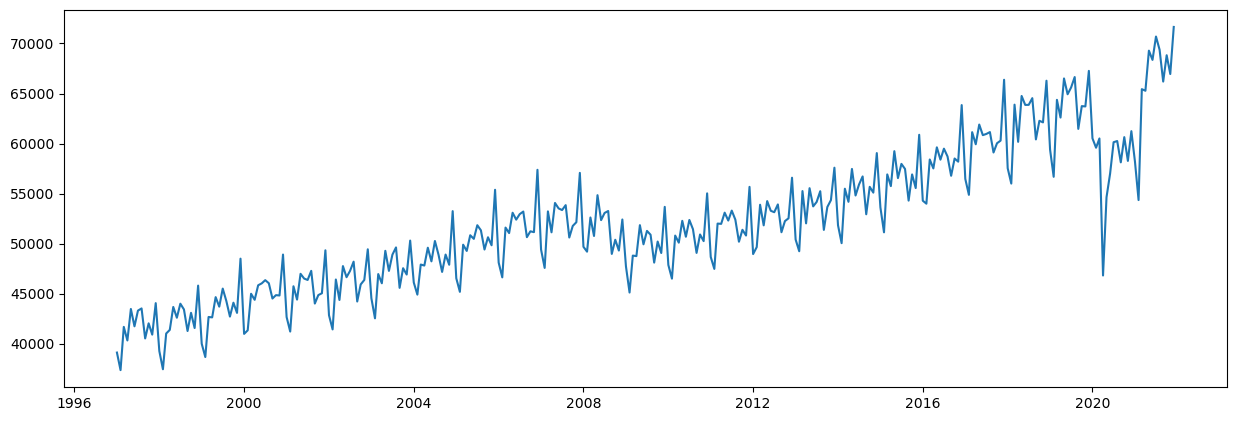

In [248]:
plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(sales3)

Initial evaluation based on the above chart suggests that the dataset is non-stationaary, evident by the increasing trend over time. 

In [294]:
sales3.isnull().sum()

Total constant dollar food sales    0
dtype: int64

In [249]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sales3, model='additive')

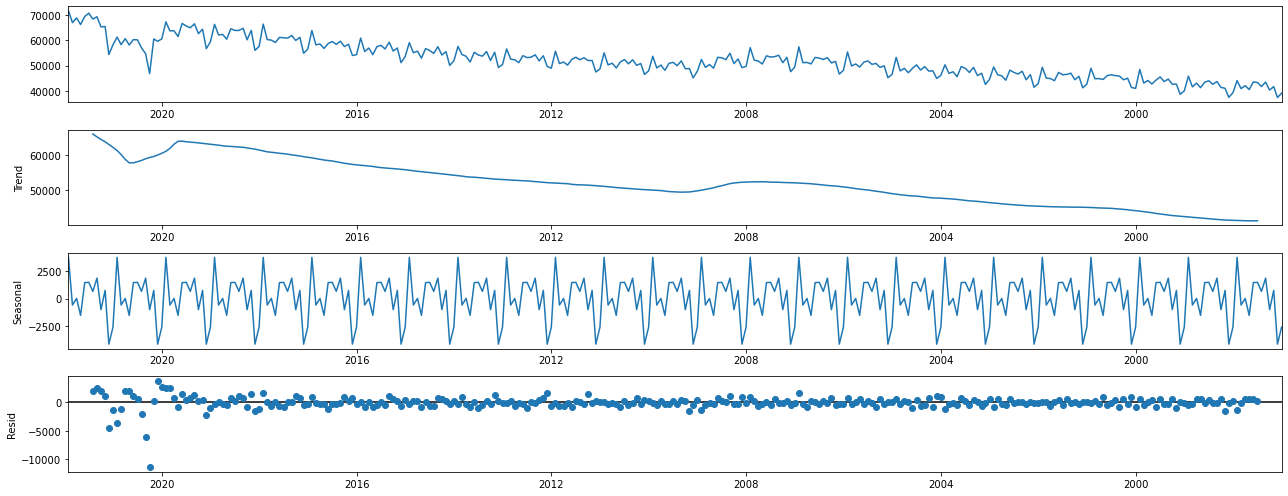

In [250]:
# Plot the separate components

decomposition.plot()
plt.show()

An observation of the graphs above shows that there is a great deal of volatility in the level data.  The trend line futher confirms that the total constant dollar food sales data is non-stationary, and tends to follow the level line as an increasing trend from 1997 to 2021, with drops around 2010 and again in 2020. This may be reflective of the financial crisis in the late 2000s and more recently the effects of the COVID-19 pandemic. 

There appears to be seasonality reflected as well in the dataset, and there is residual noise after trend and seasonality have been factored out.

In [251]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sales3)

Dickey-Fuller Stationarity test:
Test Statistic                  -0.497489
p-value                          0.892506
Number of Lags Used             15.000000
Number of Observations Used    284.000000
Critical Value (1%)             -3.453587
Critical Value (5%)             -2.871771
Critical Value (10%)            -2.572222
dtype: float64


The Dickey-Fuller test confirms that the data is non-stationary. The null hypothesis cannot be rejected because the critical value (5%) has a value of -2.871771, which is smaller than the Test Statistic of -0.497489.

### 6. Stationarizing the 'Total constant dollar food sales' data

In [252]:
sales4 = sales3 - sales3.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [253]:
# remove missing values resulting from differencing
sales4.dropna(inplace=True) 

In [295]:
sales4.head()

Total constant dollar food sales
datetime                                    
2021-11-01                          -4706.30
2021-10-01                           1876.90
2021-09-01                          -2630.82
2021-08-01                           3182.06
2021-07-01                           1319.30

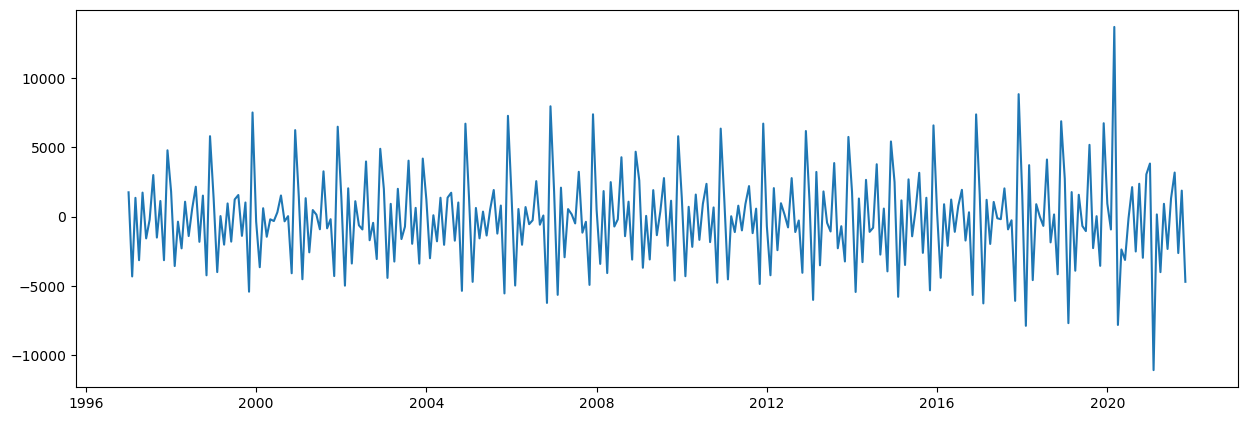

In [256]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(sales4)

In [255]:
dickey_fuller(sales4)

Dickey-Fuller Stationarity test:
Test Statistic                -6.174683e+00
p-value                        6.674749e-08
Number of Lags Used            1.400000e+01
Number of Observations Used    2.840000e+02
Critical Value (1%)           -3.453587e+00
Critical Value (5%)           -2.871771e+00
Critical Value (10%)          -2.572222e+00
dtype: float64


##### Parameter d = 1

The line graph reflects a much more horizontal line, eliminating the prior trend.  Conducting the Dickey-Fuller test again shows that the test statistic is now smaller than critical value at both the 5 and 10 percent significance levels. The null hypothesis can be rejected, and the series is now stationary.

### 7. Bonus Task

In [258]:
# Check out a plot of partial autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

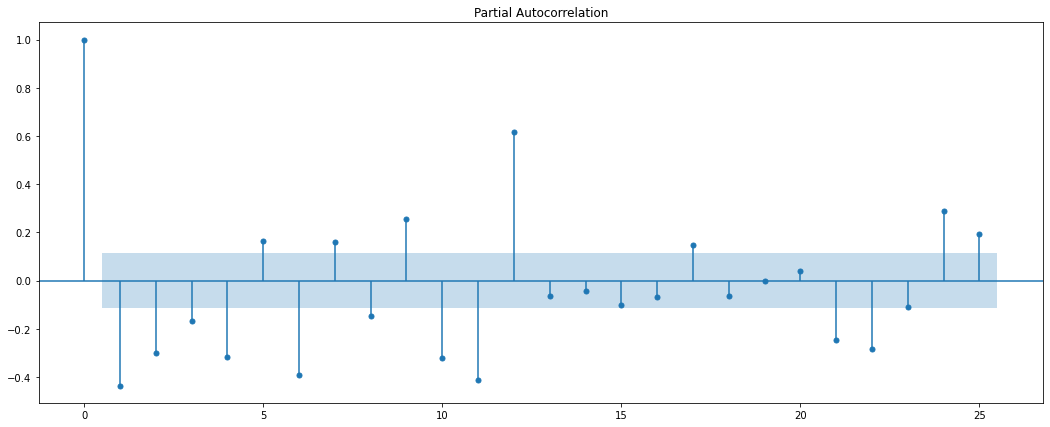

<Figure size 4500x4500 with 0 Axes>

In [260]:
plot_pacf(sales4)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

##### Parameter  p = 5 

Running the partial autocorrelation highlighted a number of positive bars suggesting significant correlations.

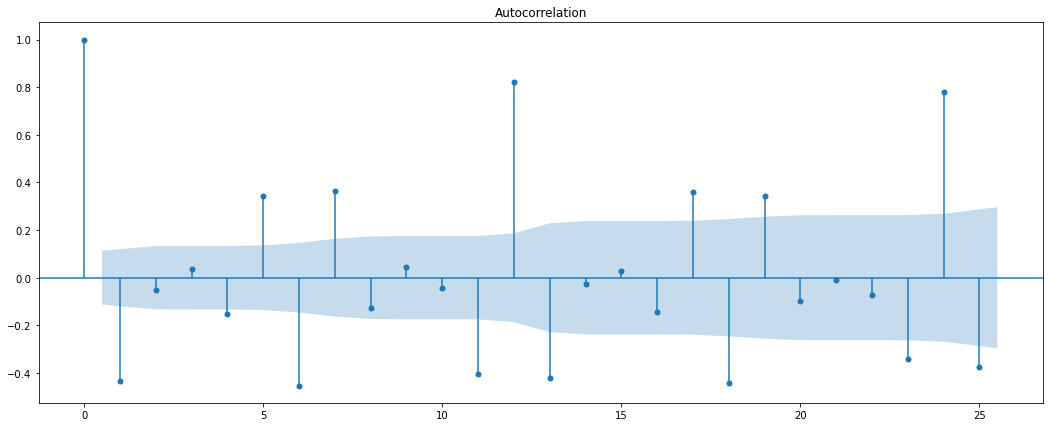

<Figure size 1500x500 with 0 Axes>

In [261]:
# Check out a plot of autocorrelations
plot_acf(sales4)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

##### Parameter q = 7

There are a seven significant autocorrelations noted in the graph above.

### 8. Splitting the data

I decided to split the data around 2017 to see how well the model predicts constant dollar food sales before and after the height of the COVID-19 pandemic. 

In [360]:
# Split the data

train = sales4['Total constant dollar food sales'][50:]
test = sales4['Total constant dollar food sales'][:51]

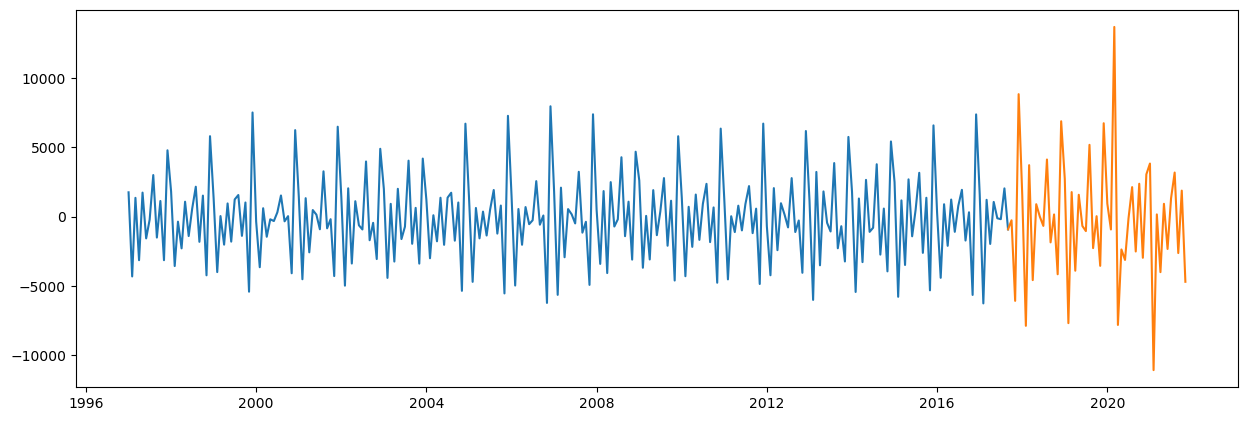

In [361]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [362]:
test.shape

(51,)

In [277]:
from statsmodels.tsa.api import ARIMA # Import the model you need

##### Parameters are p = 5, d = 1, q = 7

In [368]:
model = ARIMA(train, order=(5, 1, 7))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

C:\Users\howl6\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\howl6\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS 

LinAlgError: SVD did not converge

With p = 5 and q = 7, the ARIMA model failed.

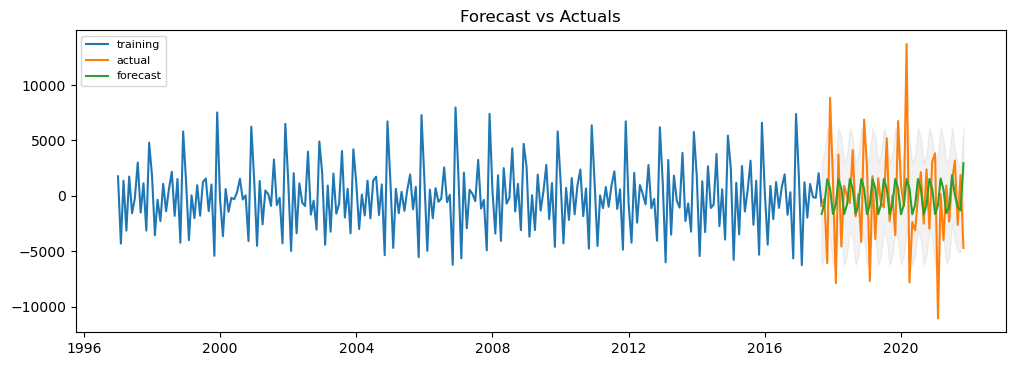

In [370]:
# Forecast
fc, se, conf = fitted.forecast(51, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This forecasting model chart above shows that most of the actual values (orange line) fall within the confidence interval (gray area) of the forecast (green line).

### 9. Second iteration

#### For this iteration the p value will be reduced to p = 4.

In [369]:
model = ARIMA(train, order=(4, 1, 7))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

C:\Users\howl6\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
C:\Users\howl6\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\howl6\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
C:\Users\howl6\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\howl6\anaconda3\lib\s

LinAlgError: SVD did not converge

With p = 4 and q = 7, the ARIMA model failed.

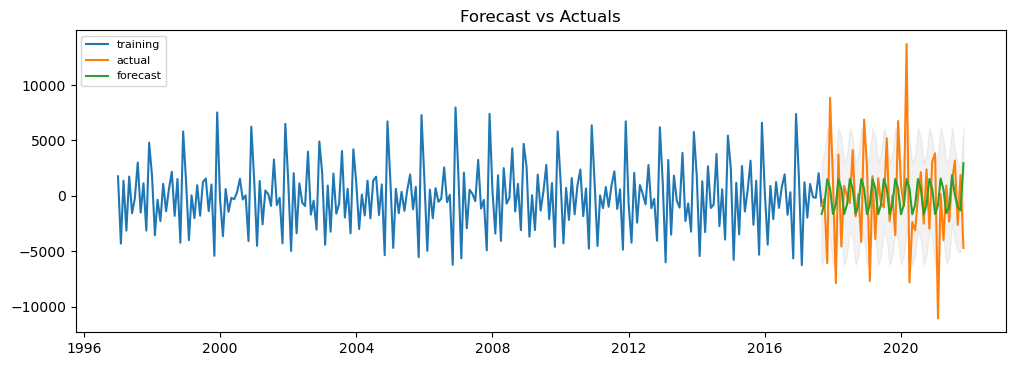

In [371]:
fc, se, conf = fitted.forecast(51, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This iteration above shows the forecast values following a similar pattern of the actual values (orange line), with some outliers, and most values falling within the confidence interval (gray area).

### 10. Third iteration

For this iteration the p value will be reduced to p = 3.

In [372]:
model = ARIMA(train, order=(3, 1, 7))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

C:\Users\howl6\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\howl6\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS 

                                     ARIMA Model Results                                      
Dep. Variable:     D.Total constant dollar food sales   No. Observations:                  248
Model:                                 ARIMA(3, 1, 7)   Log Likelihood               -2196.877
Method:                                       css-mle   S.D. of innovations           1635.199
Date:                                Thu, 07 Apr 2022   AIC                           4417.754
Time:                                        23:04:05   BIC                           4459.915
Sample:                                             1   HQIC                          4434.726
                                                                                              
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                 

As seen in the ARIMA model above, with p = 3 and q =7, all of the 'ar' & 'ma' coefficients are statistically significant (p<=0.05).

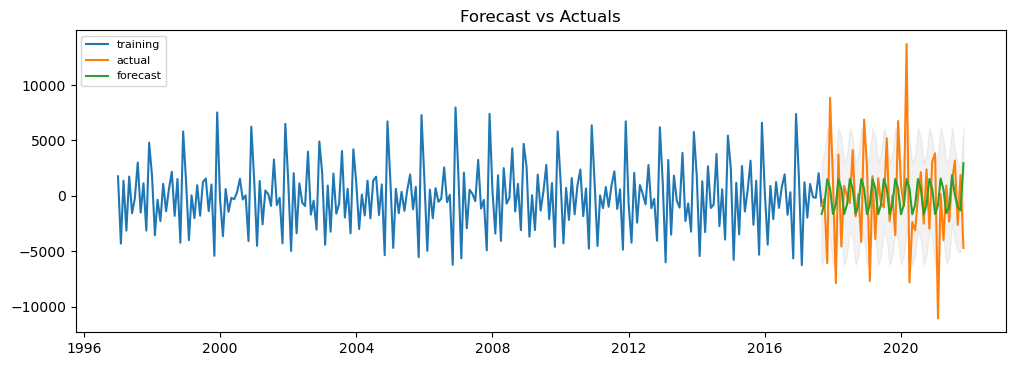

In [373]:
fc, se, conf = fitted.forecast(51, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This iteration above is consistent with the 1st and 2nd forecasting models, showing the forecast values following a similar pattern of the actual values (orange line), with some outliers, and most values falling within the confidence interval (gray area).

### 11. Fourth iteration

For this iteration the p value will be reduced to p = 2.

In [375]:
model = ARIMA(train, order=(2, 1, 7))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

C:\Users\howl6\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
C:\Users\howl6\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\howl6\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  warnings.warn('No frequency information was'
C:\Users\howl6\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


                                     ARIMA Model Results                                      
Dep. Variable:     D.Total constant dollar food sales   No. Observations:                  248
Model:                                 ARIMA(2, 1, 7)   Log Likelihood               -2223.552
Method:                                       css-mle   S.D. of innovations           1843.064
Date:                                Thu, 07 Apr 2022   AIC                           4469.105
Time:                                        23:06:31   BIC                           4507.752
Sample:                                             1   HQIC                          4484.663
                                                                                              
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                 

In this iteration, one of the 'ar' values is not statistically significant (p = 0.244)

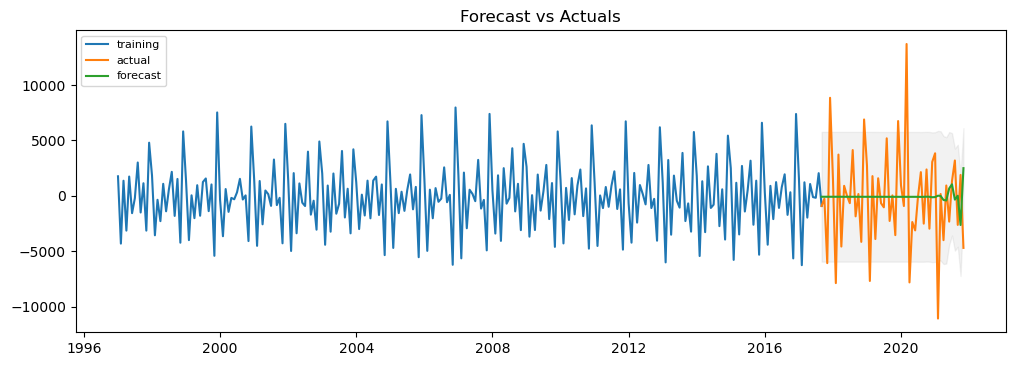

In [376]:
fc, se, conf = fitted.forecast(51, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set

# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve
lower_series = pd.Series(conf[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

By reducing AR = 1, the forecasted value is mostly flat, but more consistently aligns with the actual values by 2021, and the confidence interval is more evenly spread.

In the third and fourth iterations, after reducing the AR pararmater for each iteration respectively, the ARIMA generated statistically significant results.  However, only 1 of 2 AR parameters in the fourth iteration was significant, suggesting that the 3rd iteration may represent a better fit model.